## CLASSIFICATION: UNCLASSIFIED

## Using Keras with Theano or Tensorflow backend

Installing in your conda environment:

    conda install keras

Tensorflow is the default backend. Theano can also be used. 


### Theano

To use Theano, something like this should be in your ~/.keras//keras.json file:
    
    {
        "image_data_format": "channels_last",
        "floatx": "float32",
        "backend": "theano",         
        "epsilon": 1e-07
    }

To use GPU rather than CPU, the following are required:

* module load cuda
* a ''.theanorc'' file with:
    
        [global]
        floatX = float32
        device = gpu
        [lib]
        cnmem = 1
    

### Tensorflow

To use Theano, something like this should be in your ~/.keras//keras.json file:

    {
        "image_data_format": "channels_last",
        "floatx": "float32",
        "backend": "tensorflow",
        "epsilon": 1e-07
    }




## Example: simple linear regression with a FFNN

We learn a 1-unit feed forward neural net, which amounts to 
linear regression. We show the three steps usewd in this process:

* build the model, layer by layer (here, we define a single layer)
* compile the model (specify the loss function, the optimizer ...)
* fit the model to data (here, toy data)


In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense

## toy data for regression
X = [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7,11,5,8,5,9,3.1,10]
Y = [1.7,2.7,2.1,3.2,1.7,1.6,3.3,2.6,2.5,1.2,2.8,3.4,1.6,2.9,2.4,2.9,1.3,3.8]

model = Sequential()
model.add(Dense(1, input_dim=1))
model.summary()


Using Theano backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2.0
Trainable params: 2
Non-trainable params: 0.0
_________________________________________________________________


In [2]:
## Fit the regression
model.compile(loss='mse', optimizer='adam')
model.fit(X, Y, epochs=500, verbose=0, batch_size=3);


### Extract the regression parameters

In this simple example, there in a single unit, with a single weight $a$ , and the bias $b$,
which make up the regression model $ y = a \cdot x + b $.
Below is the syntax to extract the weight(s) and bias from a layer in the model.


In [3]:
## weight(s) and bias for layer 0
a = model.layers[0].get_weights()[0][0][0]
b = model.layers[0].get_weights()[1][0]
print(a,b)

0.29105 0.542515


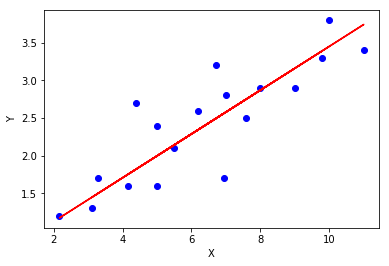

In [4]:
## compare predicted and Y values
pred = model.predict(X)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X,Y,'bo') ## plot true values as blue circles
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X,pred,'r-') ## predicted line in red
plt.show()